# Diabetes classification; Finally

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier as RC, LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Importing Dataset

In [2]:
df = pd.read_csv('Diabetes_data.csv')

Exploratory Data Analysis

In [3]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [5]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

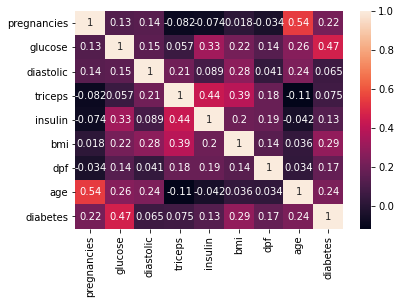

In [6]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'pregnancies And diabetes')

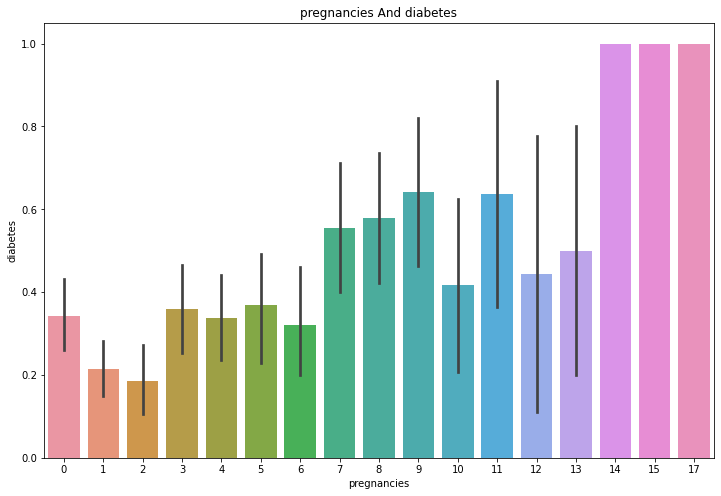

In [7]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'pregnancies', y = 'diabetes', data = df)
plt.title('pregnancies And diabetes')

Text(0.5, 1.0, 'glucose and diabetes')

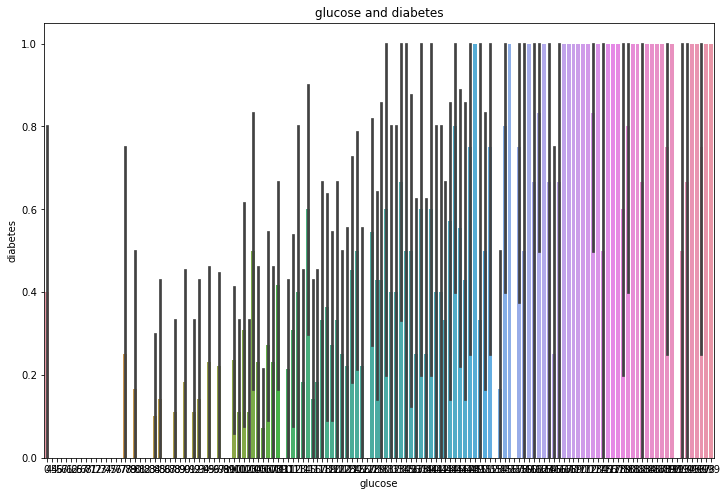

In [8]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'glucose', y = 'diabetes', data = df)
plt.title('glucose and diabetes')

Text(0.5, 1.0, 'age and diabetes')

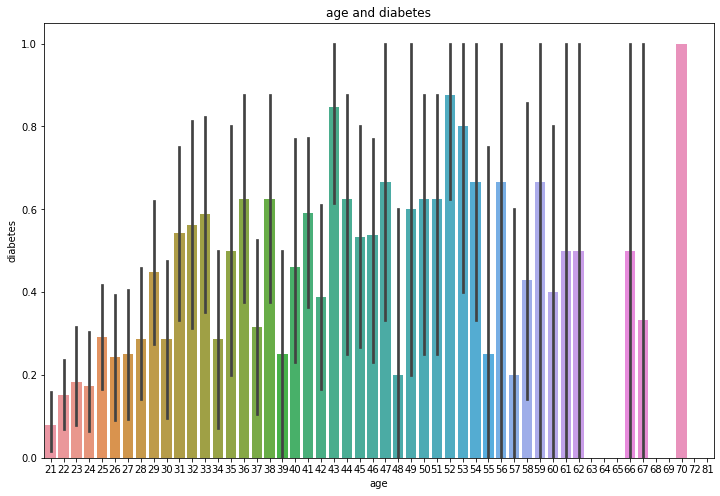

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'diabetes', data = df)
plt.title('age and diabetes')

Classification

In [10]:
y = df.diabetes
x = df.drop('diabetes', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 176)

In [11]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(576, 8) (192, 8) (576,) (192,)


In [12]:
models = {'Ridge' : make_pipeline(StandardScaler(), RC(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RFC(random_state=123)),
    'LogisticRegression' : make_pipeline(StandardScaler(), LR(random_state=123)),
    'DecisionTreeClassifier' : make_pipeline(StandardScaler(), DTC(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GBC(random_state=123))}


In [13]:
models

{'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'DecisionTreeClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

In [14]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

Ridge
RandomForest
LogisticRegression
DecisionTreeClassifier
GradientBoosting


In [15]:
models_fit

{'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'DecisionTreeClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

In [16]:
res1 = []
names = []
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    names.append(name)
    r1 = accuracy_score(ytest, ypred)
    res1 = np.append(res1, r1)
    output = "%s|Accuracy = %f" %(name, r1)
    print(output)


Ridge|Accuracy = 0.765625
RandomForest|Accuracy = 0.723958
LogisticRegression|Accuracy = 0.760417
DecisionTreeClassifier|Accuracy = 0.708333
GradientBoosting|Accuracy = 0.744792


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

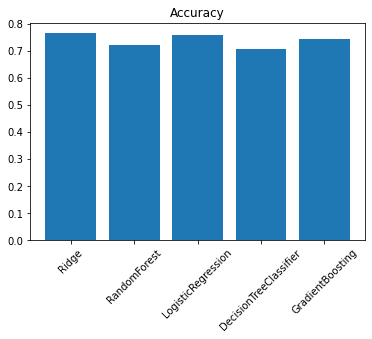

In [17]:
plt.bar(names, res1)
plt.title('Accuracy')
plt.xticks(rotation = 45)

array([0.765625  , 0.72395833, 0.76041667, 0.70833333, 0.74479167])

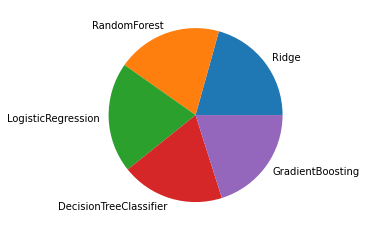

In [18]:
res1 = np.array(abs(res1))
plt.pie(res1, labels = names)
res1

HyperParameter Tuning

In [ ]:
model = make_pipeline(StandardScaler(), RidgeClassifier(alpha=1.0, fit_intercept=True, normalize='deprecated',
                                        copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='auto',
                                        random_state=None))

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')

More Model(s) With Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [ ]:
RC_hyperparameters = {
    'alpha' : [0, 0.25, 0.5, 0.75, 1],
    'normalize' : [True, False], 
    'max_iter' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'tol' : [0.001, 0.0001, 0.00001]
}

In [ ]:
model1 = RC()
model1 = RS(model1, RC_hyperparameters, n_iter=50)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{accuracy_score(ytest, ypred1)}')

In [ ]:
model1.best_params_
print(model1.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV as GS

model2 = RC()
model2 = GS(model2, RC_hyperparameters)
model2.fit(xtrain, ytrain)
model2.best_params_
ypred2 = model2.predict(xtest)
print(f'{accuracy_score(ytest, ypred2)}')

In [ ]:
model2.best_params_
print(model2.best_params_)

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KN
model3 = KN()
model3.fit(xtrain, ytrain)
ypred = model3.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')


0.7239583333333334
